In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
from umap import UMAP

C:\Users\kb_ha\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\kb_ha\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\kb_ha\AppData\Local\Programs\Python\Python39\

In [2]:
file_path = './data2.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

In [3]:
data.head(1)

,titre,description,archive,typeform,catform,deflang,username,datecreat,datedeb,datefin,...,Top Of Mind Marque DZ,Notoriete Assistee,Connaissance Marque Condor,Origirne de Notorite,Suivre Condor sur RS,Presence Condor sur RS,Decouverte Produit Condor sur RS,Quel Produit decouvert sur RS,Participation Condor Pour la marque,Proposition Ecrites
0,[Etude Universitaire] - Impact de la communica...,"Sous le thï¿½ï¿"" La communication Digitale et ...",False,O2A,QUESTIONNAIRE EN TENANT COMPTE DU CSP,French,admin,"6/3/2021, 2:40:31 PM","6/3/2021, 7:30:22 PM","6/10/2021, 9:58:59 PM",...,"condor,geant,irys","Samsung,Huawei,,Condor,LG,Brandt,,,,,","OUI je connais condor,","Affichage,TV,,,",",Non JeNesuisPas Condor",",,,,",",",NaN,NaN,pas d'opinion


In [50]:
data.head(5)

,titre,description,archive,typeform,catform,deflang,username,datecreat,datedeb,datefin,...,Top Of Mind Marque DZ,Notoriete Assistee,Connaissance Marque Condor,Origirne de Notorite,Suivre Condor sur RS,Presence Condor sur RS,Decouverte Produit Condor sur RS,Quel Produit decouvert sur RS,Participation Condor Pour la marque,Proposition Ecrites
0,[Etude Universitaire] - Impact de la communica...,"Sous le thï¿½ï¿"" La communication Digitale et ...",False,O2A,QUESTIONNAIRE EN TENANT COMPTE DU CSP,French,admin,"6/3/2021, 2:40:31 PM","6/3/2021, 7:30:22 PM","6/10/2021, 9:58:59 PM",...,"condor,geant,irys","Samsung,Huawei,,Condor,LG,Brandt,,,,,","OUI je connais condor,","Affichage,TV,,,",",Non JeNesuisPas Condor",",,,,",",",NaN,NaN,pas d'opinion
1,[Etude Universitaire] - Impact de la communica...,"Sous le thï¿½ï¿"" La communication Digitale et ...",False,O2A,QUESTIONNAIRE EN TENANT COMPTE DU CSP,French,admin,"6/3/2021, 2:40:31 PM","6/3/2021, 7:30:22 PM","6/10/2021, 9:58:59 PM",...,"condor,geant ,starlight","Samsung,Huawei,BEKO,Condor,LG,Brandt,Iris,,Sta...","OUI je connais condor,","Affichage,TV,,Ami(e)s Famille Proche,",",Non JeNesuisPas Condor",",,,,",",",NaN,NaN,NaN
2,[Etude Universitaire] - Impact de la communica...,"Sous le thï¿½ï¿"" La communication Digitale et ...",False,O2A,QUESTIONNAIRE EN TENANT COMPTE DU CSP,French,admin,"6/3/2021, 2:40:31 PM","6/3/2021, 7:30:22 PM","6/10/2021, 9:58:59 PM",...,"condor,brandt,eniem","Samsung,Huawei,BEKO,Condor,LG,Brandt,Iris,Rayl...","OUI je connais condor,",",TV,,,",",Non JeNesuisPas Condor",",,,,",",",NaN,NaN,publicitï¿½
3,[Etude Universitaire] - Impact de la communica...,"Sous le thï¿½ï¿"" La communication Digitale et ...",False,O2A,QUESTIONNAIRE EN TENANT COMPTE DU CSP,French,admin,"6/3/2021, 2:40:31 PM","6/3/2021, 7:30:22 PM","6/10/2021, 9:58:59 PM",...,"condor ,iris,brandt","Samsung,Huawei,BEKO,Condor,LG,Brandt,Iris,Rayl...","OUI je connais condor,","Affichage,TV,Reseaux Sociaux ,Ami(e)s Famille ...",",Non JeNesuisPas Condor",",,,,",",",NaN,NaN,NaN
4,[Etude Universitaire] - Impact de la communica...,"Sous le thï¿½ï¿"" La communication Digitale et ...",False,O2A,QUESTIONNAIRE EN TENANT COMPTE DU CSP,French,admin,"6/3/2021, 2:40:31 PM","6/3/2021, 7:30:22 PM","6/10/2021, 9:58:59 PM",...,"enie,sream,iris","Samsung,Huawei,BEKO,Condor,LG,Brandt,Iris,,Sta...","OUI je connais condor,","Affichage,TV,,,",",Non JeNesuisPas Condor",",,,,",",",NaN,NaN,NaN


In [5]:
data.shape

(61, 49)

# PCA Implementation

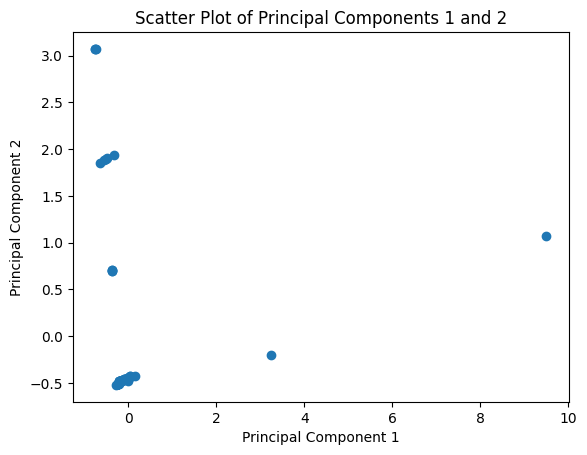

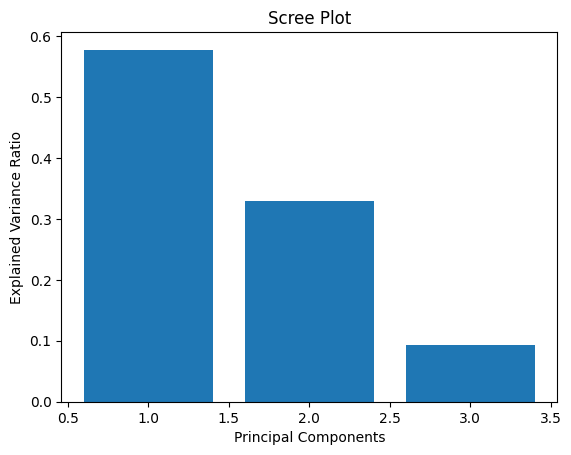

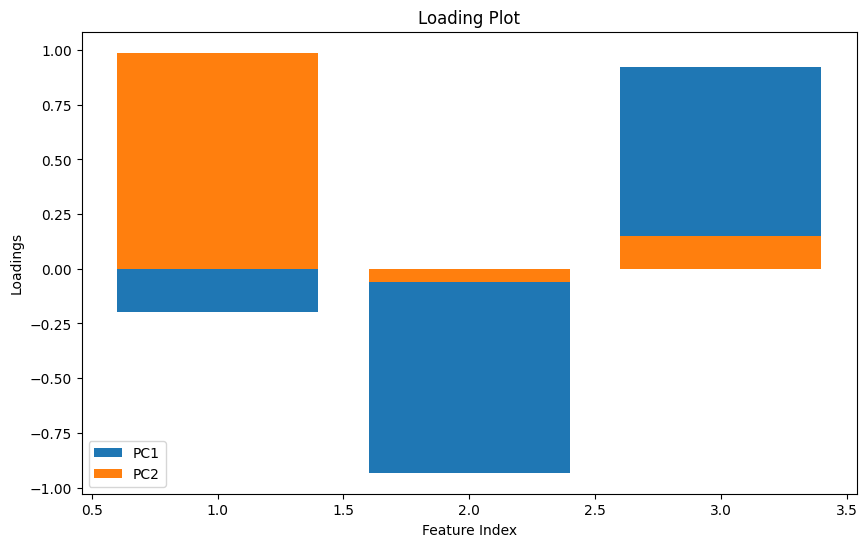

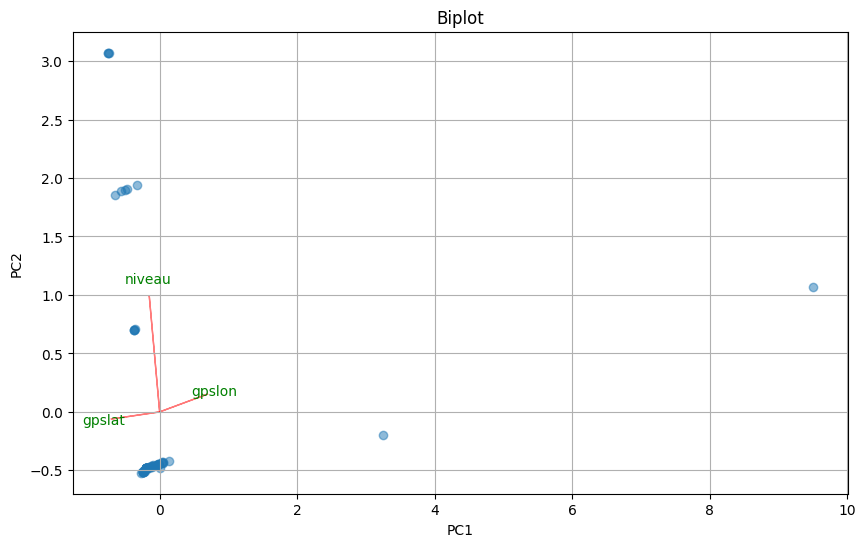

In [13]:
file_path = './data2.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

#removing the 40th column 
data.drop(data.columns[40], axis=1, inplace=True)
# Remove non-numeric columns like 'titre', 'description', etc.
numeric_data = data.drop(['titre', 'description', 'archive', 'typeform', 'catform', 'deflang', 'username', 'datecreat', 'datedeb', 'datefin',
                          'raisonsociale', 'cliadr', 'cliville', 'enqueteur', 'daterepon', 'uidrpnd', 'adresse', 'annï¿½ï¿½', 'wilaya', 'sexe',
                          'sitfam', 'sitprof', 'nivetude', 'profession', 'isparrain', 'isanonyme', 'emploie', 'csp', 'gpslatrepon', 'gpslonrepon',
                          'Present sur RS', 'RS utilise', 'Raisons Utilisation RS', 'Suivre Les Marques', 'Marque Doit etre sur RS',
                          'Top Of Mind Marque', 'Top Of Mind Marque DZ', 'Connaissance Marque Condor',
                          'Origirne de Notorite', 'Suivre Condor sur RS', 'Presence Condor sur RS', 'Decouverte Produit Condor sur RS',
                          'Quel Produit decouvert sur RS', 'Participation Condor Pour la marque', 'Proposition Ecrites'], axis=1)


# Handle missing values if needed
numeric_data.fillna(0, inplace=True)

# Performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Analyze and visualize the principal components

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components 1 and 2')
plt.show()


explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.components_) + 1), loadings[:, 0], label='PC1')
plt.bar(range(1, len(pca.components_) + 1), loadings[:, 1], label='PC2')
plt.xlabel('Feature Index')
plt.ylabel('Loadings')
plt.title('Loading Plot')
plt.legend()
plt.show()


def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(score[:, 0], score[:, 1], alpha=0.5)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot")
    plt.grid()
    plt.show()

# Create the biplot
biplot(pca_result[:, :2], np.transpose(pca.components_[:2, :]), labels=numeric_data.columns)
# You can also access the principal components using pca_result
#print('==========================================Principal Components:=========================================')
#print(pca_result) 

# UMAP Implementation

In [16]:
file_path = './data2.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

data.drop(data.columns[40], axis=1, inplace=True)
# Remove non-numeric columns like 'titre', 'description', etc.
numeric_data = data.drop(['titre', 'description', 'archive', 'typeform', 'catform', 'deflang', 'username', 'datecreat', 'datedeb', 'datefin',
                          'raisonsociale', 'cliadr', 'cliville', 'enqueteur', 'daterepon', 'uidrpnd', 'adresse', 'annï¿½ï¿½', 'wilaya', 'sexe',
                          'sitfam', 'sitprof', 'nivetude', 'profession', 'isparrain', 'isanonyme', 'emploie', 'csp', 'gpslatrepon', 'gpslonrepon',
                          'Present sur RS', 'RS utilise', 'Raisons Utilisation RS', 'Suivre Les Marques', 'Marque Doit etre sur RS',
                          'Top Of Mind Marque', 'Top Of Mind Marque DZ', 'Connaissance Marque Condor',
                          'Origirne de Notorite', 'Suivre Condor sur RS', 'Presence Condor sur RS', 'Decouverte Produit Condor sur RS',
                          'Quel Produit decouvert sur RS', 'Participation Condor Pour la marque', 'Proposition Ecrites'], axis=1)


# Handle missing values if needed
numeric_data.fillna(0, inplace=True)
numeric_data.head()

,niveau,gpslat,gpslon
0,1,0.220000,0.001000
1,1,36.679462,2.898846
2,3,36.692100,2.869713
3,1,36.718350,3.124275
4,2,36.675320,2.902960


In [19]:
umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)

# Fit UMAP to your data
umap_result = umap_model.fit_transform(numeric_data)

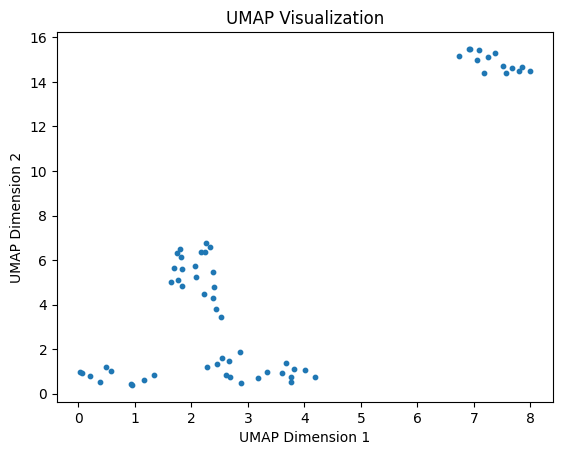

In [20]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], s=10)  # You can adjust marker size

# Add labels, title, etc. if needed
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization')

# Show the plot
plt.show()

# T-SNE Implementation

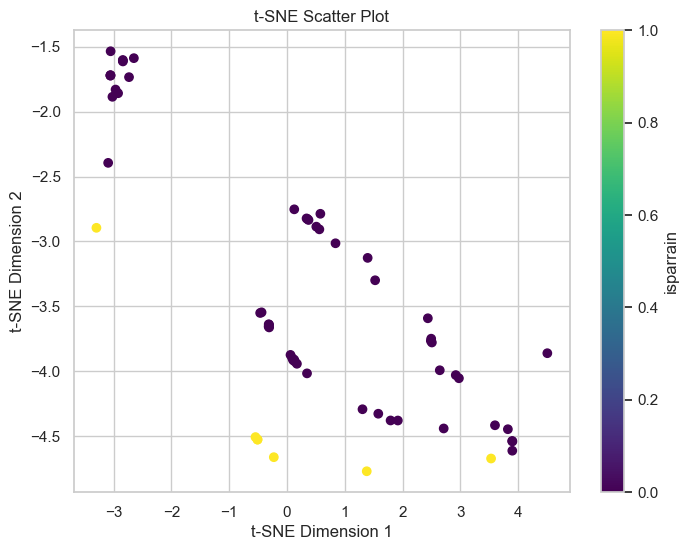

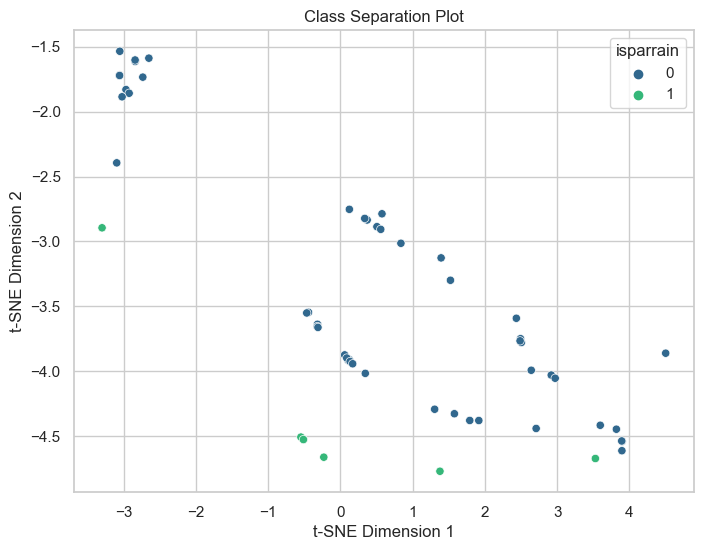

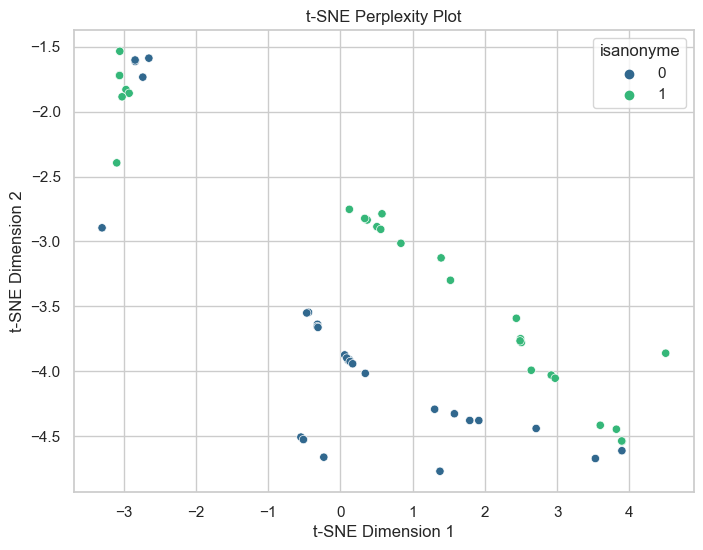

In [27]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns



# Assuming you have categorical variables 'isparrain' and 'isanonyme',
# and numeric variables 'gpslon' and 'gpslat'

# Prepare the data
X_numeric = data[['gpslon', 'gpslat']].values

# Convert categorical columns to integers
data['isparrain'] = data['isparrain'].astype(int)
data['isanonyme'] = data['isanonyme'].astype(int)

# Combine categorical and numeric data
X_combined = pd.concat([data[['isparrain', 'isanonyme']], pd.DataFrame(X_numeric, columns=['gpslon', 'gpslat'])], axis=1)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Create essential visualization plots

# t-SNE Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['isparrain'], cmap='viridis')
plt.title("t-SNE Scatter Plot")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='isparrain')
plt.show()

# Class Separation Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['isparrain'], palette='viridis')
plt.title("Class Separation Plot")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='isparrain')
plt.show()

# t-SNE Perplexity Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['isanonyme'], palette='viridis')
plt.title("t-SNE Perplexity Plot")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='isanonyme')
plt.show()


C:\Users\kb_ha\AppData\Local\Temp\ipykernel_13160\785152654.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis')


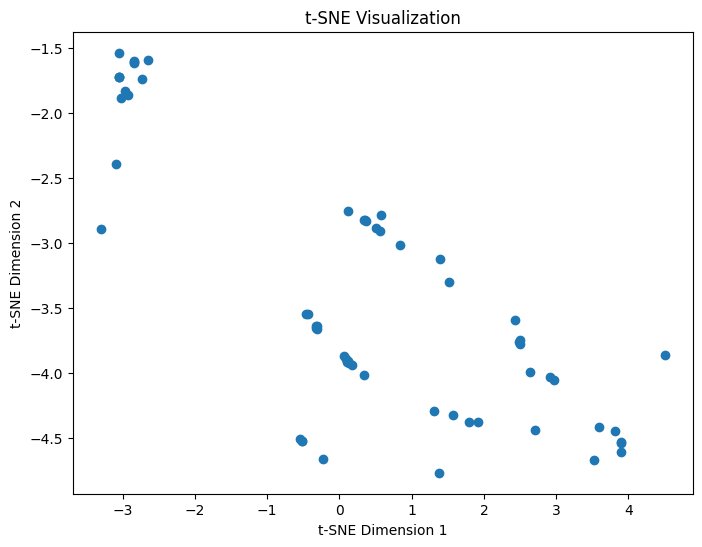

In [11]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Select columns for t-SNE
numeric_cols = ['gpslon', 'gpslat']
categorical_cols = ['isparrain', 'isanonyme']

# Preprocess categorical data (one-hot encoding)
categorical_data = pd.get_dummies(data[categorical_cols])

# Combine numeric and one-hot encoded categorical data
combined_data = pd.concat([data[numeric_cols], categorical_data], axis=1)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(combined_data)

# Create a scatter plot of t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


# LDA Implementation

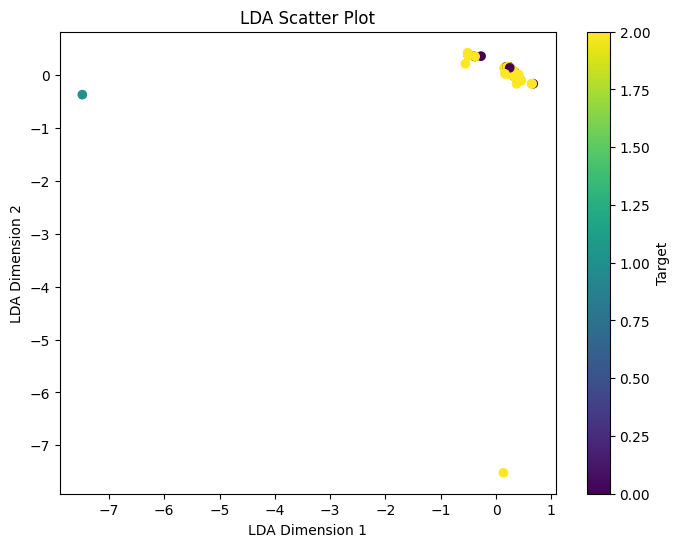

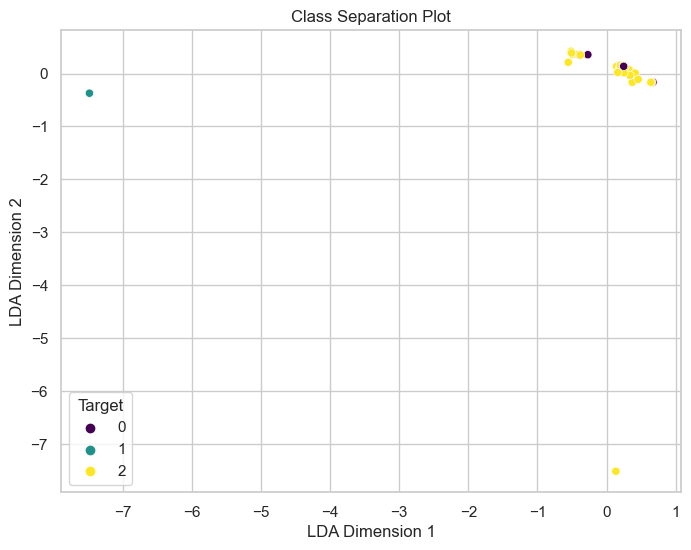

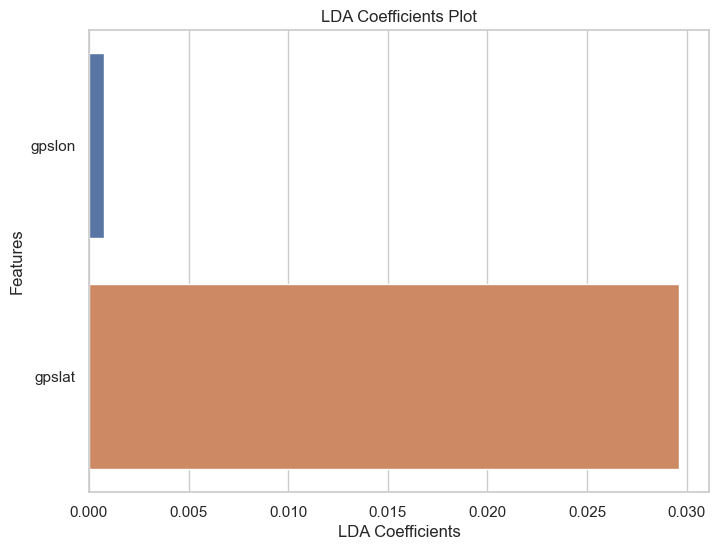

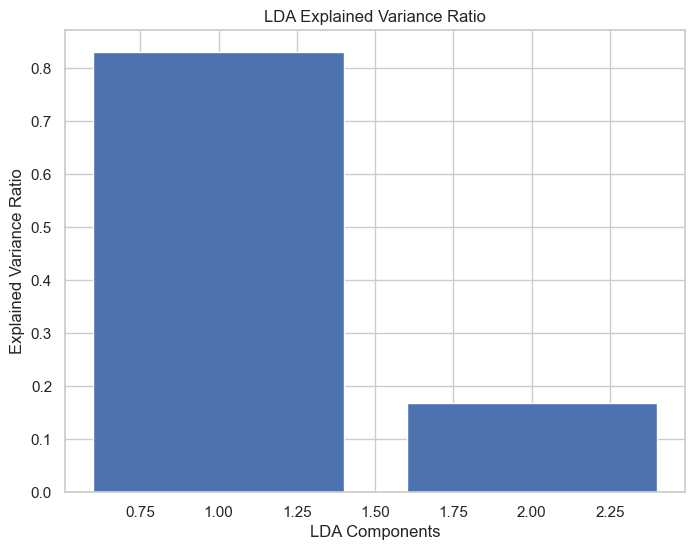

In [26]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns



# Assuming you have categorical variables 'isparrain' and 'isanonyme',
# and numeric variables 'gpslon' and 'gpslat'

# Prepare the data
X_numeric = data[['gpslon', 'gpslat']].values

# Convert categorical columns to integers
data['isparrain'] = data['isparrain'].astype(int)
data['isanonyme'] = data['isanonyme'].astype(int)

# Create a categorical target variable based on 'isparrain' and 'isanonyme'
target = data['isparrain'] + 2 * data['isanonyme']  # Assuming both are binary (0 or 1)

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_numeric, target)

# Create essential visualization plots

# LDA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=target, cmap='viridis')
plt.title("LDA Scatter Plot")
plt.xlabel("LDA Dimension 1")
plt.ylabel("LDA Dimension 2")
plt.colorbar(label='Target')
plt.show()

# Class Separation Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=target, palette='viridis')
plt.title("Class Separation Plot")
plt.xlabel("LDA Dimension 1")
plt.ylabel("LDA Dimension 2")
plt.legend(title='Target')
plt.show()

# LDA Coefficients Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=lda.coef_[0], y=['gpslon', 'gpslat'])
plt.title("LDA Coefficients Plot")
plt.xlabel("LDA Coefficients")
plt.ylabel("Features")
plt.show()

# LDA Explained Variance Ratio Plot
plt.figure(figsize=(8, 6))
explained_variance_ratio = lda.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center')
plt.title("LDA Explained Variance Ratio")
plt.xlabel("LDA Components")
plt.ylabel("Explained Variance Ratio")
plt.show()
